# Predictive Maintenance
Data set: https://archive.ics.uci.edu/dataset/316/condition+based+maintenance+of+naval+propulsion+plants

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
np.random.seed(0)

In [2]:
columns = ['lp','v','GTT','GTn','GGn','Ts','Tp','T48','T1','T2','P48','P1','P2','Pexh','TIC','mf','kMc','kMt']
data = pd.read_csv('data/data.csv', names=columns, skiprows=1)

# kMc = GT Compressor decay state coefficient, kMt = GT Turbine decay state coefficient
data.head()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [3]:
data.shape

(11934, 18)

In [4]:
data.describe().round(3)

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
count,11934.000,11934.000,11934.000,11934.000,11934.000,11934.000,11934.000,11934.000,11934.0,11934.000,11934.000,11934.000,11934.000,11934.000,11934.000,11934.000,11934.000,11934.000
mean,5.167,15.000,27247.499,2136.289,8200.947,227.336,227.336,735.495,288.0,646.215,2.353,0.998,12.297,1.029,33.641,0.662,0.975,0.988
std,2.626,7.746,22148.613,774.084,1091.316,200.496,200.496,173.681,0.0,72.676,1.085,0.000,5.337,0.010,25.841,0.507,0.015,0.008
min,1.138,3.000,253.547,1307.675,6589.002,5.304,5.304,442.364,288.0,540.442,1.093,0.998,5.828,1.019,0.000,0.068,0.950,0.975
25%,3.144,9.000,8375.884,1386.758,7058.324,60.317,60.317,589.873,288.0,578.092,1.389,0.998,7.447,1.020,13.678,0.246,0.962,0.981
50%,5.140,15.000,21630.659,1924.326,8482.082,175.268,175.268,706.038,288.0,637.142,2.083,0.998,11.092,1.026,25.276,0.496,0.975,0.988
75%,7.148,21.000,39001.427,2678.079,9132.606,332.365,332.365,834.066,288.0,693.924,2.981,0.998,15.658,1.036,44.552,0.882,0.988,0.994
max,9.300,27.000,72784.872,3560.741,9797.103,645.249,645.249,1115.797,288.0,789.094,4.560,0.998,23.140,1.052,92.556,1.832,1.000,1.000


In [5]:
data.kMc

0        0.95
1        0.95
2        0.95
3        0.95
4        0.95
         ... 
11929    1.00
11930    1.00
11931    1.00
11932    1.00
11933    1.00
Name: kMc, Length: 11934, dtype: float64

In [6]:
def get_non_target(target):
    if target == 'kMt': 
        return'kMc' 
    return 'kMt'

In [7]:
target_name = 'kMt'
non_target = get_non_target(target_name)

In [8]:
import pandas as pd

# Define a custom function to determine decay status
def get_decay_status(coeff):
    if coeff < 0.975:
        return 'done'
    elif 0.975 <= coeff < 0.99:
        return 'decaying'
    elif 0.99 <= coeff <= 1:
        return 'not decaying'
    else:
        return 'unknown'  # Handle any other cases here

# Apply the custom function to create the "decay_status" column
data['decay_status_kMc'] = data['kMc'].apply(get_decay_status)

# Print the updated DataFrame
data['decay_status_kMc'].value_counts()

decay_status_kMc
done            5850
decaying        3510
not decaying    2574
Name: count, dtype: int64

In [9]:
# Apply the custom function to create the "decay_status" column
data['decay_status_kMt'] = data['kMt'].apply(get_decay_status)

# Print the updated DataFrame
data['decay_status_kMt'].value_counts()

decay_status_kMt
decaying        6885
not decaying    5049
Name: count, dtype: int64

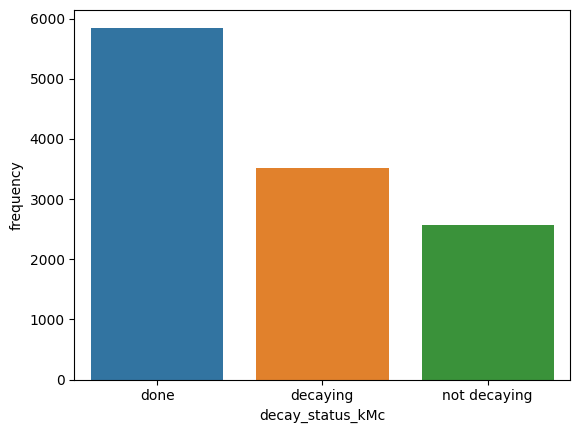

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

column = "decay_status_kMc"
category = data.decay_status_kMc.value_counts()  
category_df = category.reset_index()
category_df.columns = [column, 'frequency']

# Distribution plot of 'kMc'
ax = sns.barplot(x=column, y='frequency', data=category_df)

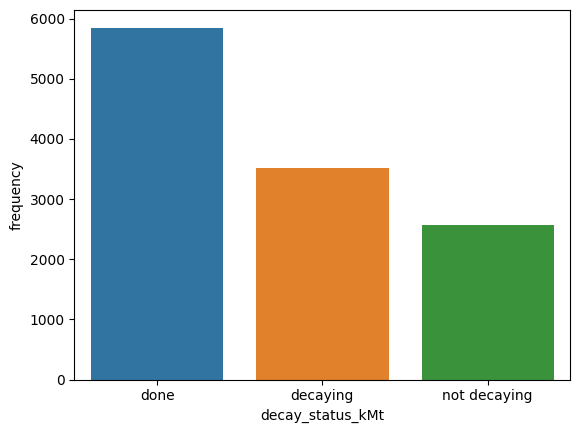

In [11]:
column = "decay_status_kMt"
category = data.decay_status_kMc.value_counts()  
category_df = category.reset_index()
category_df.columns = [column, 'frequency']

# Distribution plot of 'kMc'
ax = sns.barplot(x=column, y='frequency', data=category_df)

### Training a simple MLP as a baseline to estimate compressor decay

- Defining features and target
- splitting data into train, validation and test data, while shuffling the dataset and keeping distribution

In [12]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

torch.manual_seed(0)

features = data.drop(columns=[target_name, non_target])
target = data[target_name]

# Split data into train, validation, and test sets
train_size = 0.7
val_size = 0.15
test_size = 0.15

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=1 - train_size, random_state=42, stratify=target, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size/(test_size + val_size), random_state=42, stratify=y_temp)

- Checking for equal distribution between all three datasets

In [13]:
decay_column = f"decay_status_{target_name}"
decay_column

'decay_status_kMt'

In [14]:
X_train[decay_column].value_counts()

decay_status_kMt
decaying        4820
not decaying    3533
Name: count, dtype: int64

In [15]:
X_val[decay_column].value_counts()

decay_status_kMt
decaying        1031
not decaying     759
Name: count, dtype: int64

In [16]:
X_test[decay_column].value_counts()

decay_status_kMt
decaying        1034
not decaying     757
Name: count, dtype: int64

In [17]:
X_train = X_train.drop(columns=['decay_status_kMc', 'decay_status_kMt'])
X_val = X_val.drop(columns=['decay_status_kMc', 'decay_status_kMt'])
X_test = X_test.drop(columns=['decay_status_kMc', 'decay_status_kMt'])

In [18]:
# scale the input data for the neural network to improve convergence and speed up training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Defining different MLPs
- starting with a simple MLP to train a regression model

In [19]:
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

In [20]:
from models import MLP
from training import train_regression, evaluate_regression
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, balanced_accuracy_score

hidden_sizes = [64]
input_dim = X_train_scaled.shape[1]
output_size = 1 

mlp1 = MLP(input_dim, hidden_sizes, output_size, dropout_prob=0.0, activation_function=torch.nn.LeakyReLU)

hidden_sizes = [24, 12, 6]  # definition of hidden layers
mlp2 = MLP(input_dim, hidden_sizes, output_size, dropout_prob=0.0, activation_function=torch.nn.LeakyReLU)

hidden_sizes = [192, 288, 192, 96, 24] 
mlp3 = MLP(input_dim, hidden_sizes, output_size, dropout_prob=0.5, activation_function=torch.nn.LeakyReLU)

model_list =[mlp1, mlp2, mlp3]

for model in model_list:
    print(model)
    print("Start training ...")
    train_regression(model, 100, X_train_scaled, y_train, X_val_tensor, y_val_tensor)
    print("Evaluation of results")
    evaluate_regression(model, X_test_scaled, y_test)

    print("Get classification results from regression output")
    test_inputs = torch.tensor(X_test_scaled, dtype=torch.float32)
    test_outputs = model(test_inputs)
    eval_df = pd.DataFrame({'target': y_test.tolist(), 'prediction': [value.item() for value in test_outputs]})
    eval_df['decay_status_target'] = eval_df['target'].apply(get_decay_status)
    eval_df['decay_status_pred'] = eval_df['prediction'].apply(get_decay_status)

    y_true = eval_df['decay_status_target']
    y_pred = eval_df['decay_status_pred']
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = accuracy = balanced_accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Print the metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Balanced Accuracy: {balanced_accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1-score: {f1:.4f}')
    
    print("###########################################################################")

MLP(
  (network): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)
Start training ...
Early stopping after 65.
Evaluation of results
Mean Absolute Error (MAE): 0.0029
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0037
Get classification results from regression output
Accuracy: 0.7845
Balanced Accuracy: 0.7845
Precision: 0.8766
F1-score: 0.8336
###########################################################################
MLP(
  (network): Sequential(
    (0): Linear(in_features=16, out_features=24, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=24, out_features=12, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Dropout(p=0.0, inplace=False)
    (5): Linear(in_features=12, out_features=6, bias=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.0, inplace=False)
    (8): Linear(in_fea

C:\Users\Luca\miniconda3\envs\dl-predictive-maintenance\lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Early stopping after 54.
Evaluation of results
Mean Absolute Error (MAE): 0.0025
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0037
Get classification results from regression output
Accuracy: 0.8174
Balanced Accuracy: 0.8174
Precision: 0.8739
F1-score: 0.8428
###########################################################################
MLP(
  (network): Sequential(
    (0): Linear(in_features=16, out_features=192, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=192, out_features=288, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=288, out_features=192, bias=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=192, out_features=96, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
    (10): Dropout(p=0.5, inplace=False)
    (11): Linear(in_features=96, out_features=24, bias=True)
    (12): LeakyReLU(negative

C:\Users\Luca\miniconda3\envs\dl-predictive-maintenance\lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Early stopping after 84.
Evaluation of results
Mean Absolute Error (MAE): 0.0036
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0045
Get classification results from regression output
Accuracy: 0.8203
Balanced Accuracy: 0.8203
Precision: 0.8798
F1-score: 0.8403
###########################################################################


### XGBoostRegressor

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create an XGBRegressor model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    max_depth=3,  # Maximum depth of each tree
    objective='reg:squarederror',  # Regression task
    random_state=42
)

# Train the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Predict the target variable on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred, squared=True)

print("Mean Absolute Error:", "{:.10f}".format(mae))
print("Mean Squared Error:", "{:.10f}".format(mse))
print("Root Mean Squared Error:", "{:.10f}".format(rmse))

Mean Absolute Error: 0.0025460476
Mean Squared Error: 0.0000116126
Root Mean Squared Error: 0.0034077318


In [23]:
eval_df = pd.DataFrame({'target': y_test.tolist(), 'prediction': y_pred.tolist()})
eval_df["prediction"] = eval_df.prediction.astype(float)
eval_df['decay_status_target'] = eval_df['target'].apply(get_decay_status)
eval_df['decay_status_pred'] = eval_df['prediction'].apply(get_decay_status)

y_true = eval_df['decay_status_target']
y_pred = eval_df['decay_status_pred']

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
balanced_accuracy = accuracy = balanced_accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.8869
Balanced Accuracy: 0.8869
Precision: 0.9057
F1-score: 0.8985
